In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Análisis del dataset de mentalHealthAndSocialMedia

Lo primero es importar el dataset y ver que datos tiene

In [2]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0


Como se puede comprobar, el dataset tiene 10 columnas y 500 filas, lo que para un entrenamiento apropiado puede ser poco. Además se puede observar una columna User_ID la cual quiero que sea el indice de cada fila y que hay una columna como es el genero que tiene datos categoricos por lo que puedo transformalos a valores de 0 (Male), 1 (Female) y 2 (Other). Además tambien hay una columna con datos del nombre de las redes sociales que en los siguientes pasos se analizará si se pueden cambiar por valores númericos o se necesitará hacer otra cosa.

In [3]:
#Cambiar el indece de las filas a la columna User_ID
df.set_index('User_ID', inplace=True)
df_copy = df.copy()

In [4]:
#Mapear los valores categoricos de la columna Gender
df_copy["Gender"] = df_copy["Gender"].map({'Male': 0, 'Female': 1, 'Other': 2})
df_copy

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
User_ID,,,,,,,,,
U001,44,0,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
U002,30,2,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
U003,23,2,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
U004,36,1,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
U005,34,1,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...
U496,23,0,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
U497,43,1,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
U498,41,0,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0


In [5]:
#Cuantas redes sociales diferentes hay en la columna Social_Media_Platform
redes_sociales = df_copy["Social_Media_Platform"].unique()
print(redes_sociales)

['Facebook' 'LinkedIn' 'YouTube' 'TikTok' 'X (Twitter)' 'Instagram']


Como se puede observar el número de valores que toman las redes sociales es de 6 (sin aparecer valores nan) por lo que es asequible covertir estos datos categoricos a núméricos para un mejor analisis, pasando a ser: 0 (Facebook), 1 (LinkedIn), 2 (Youtube), 3 (TikTok), 4 (X (Twitter)) y 5 (Instagram)

In [6]:
df_copy["Social_Media_Platform"] = df_copy["Social_Media_Platform"].map({'Facebook': 0, 'LinkedIn': 1, 'YouTube': 2, 'TikTok': 3, 'X (Twitter)': 4, 'Instagram': 5})
df_copy

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
User_ID,,,,,,,,,
U001,44,0,3.1,7.0,6.0,2.0,5.0,0,10.0
U002,30,2,5.1,7.0,8.0,5.0,3.0,1,10.0
U003,23,2,7.4,6.0,7.0,1.0,3.0,2,6.0
U004,36,1,5.7,7.0,8.0,1.0,1.0,3,8.0
U005,34,1,7.0,4.0,7.0,5.0,1.0,4,8.0
...,...,...,...,...,...,...,...,...,...
U496,23,0,6.9,5.0,7.0,4.0,2.0,4,10.0
U497,43,1,5.6,7.0,6.0,5.0,2.0,0,9.0
U498,41,0,7.7,5.0,7.0,2.0,2.0,1,8.0


Con estas transformaciones en el dataset, podemos pasar a analizar los distintos elementos.

In [7]:
df_copy.describe()

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,0.55000,5.530000,6.304000,6.618000,3.134000,2.448000,2.488000,8.376000
std,9.960637,0.58325,1.734877,1.529792,1.542996,1.858751,1.428067,1.677941,1.524228
min,16.000000,0.00000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,4.000000
25%,24.000000,0.00000,4.300000,5.000000,6.000000,2.000000,1.000000,1.000000,7.000000
50%,34.000000,1.00000,5.600000,6.000000,7.000000,3.000000,2.000000,3.000000,9.000000
75%,41.000000,1.00000,6.700000,7.000000,8.000000,5.000000,3.000000,4.000000,10.000000
max,49.000000,2.00000,10.800000,10.000000,10.000000,9.000000,7.000000,5.000000,10.000000


Con estos datos se puede comprobar que:

- La edad de las personas esta comprendida entre 16 y 49.
- Aunque aparecen valores minimos de 0 en algunos casos como el genero es porque hemos transformado valores catergoricos a númericos y estos no tienen sentido que tengan otros valores (lo mismo con las redes sociales). Y en otros casos como los dias sin redes sociales puede ser factible que las personas esten diariamente en redes sociales.
- En cuanto a la calidad del sueño, el nivel de estrés y la felicidad tiene sentido los valores de mínimo y maximo puesto que son valores comprendidos entre 1 y 10.
- Y para el caso de horas frenta a la pantalla y la frecuencia con la que se hace ejercicio los valores no parecen que presenten outlayers a primera vista.
- La edad media de las personas es de unos 33 años por lo que se puede deducir que la distribucion de los datos esta centrada en adultos jovenes, y que los datos tienen una dispersión moderada ya que la desviación estandar es de 9.96.
- La puede ver que el uso medio de la pantalla es de 5.53 horas que es un uso moderado-alto.
- De la media de calidad de sueño que es 6.3, de el nivel de estrés que es 6.61 y de la felicidad que es 8.38 se puede deducir que la población es feliz en general, tienen un estrés moderado y una calidad del sueño aceptable.
- Y con la media de ejercicio de 2.45 veces de ejercicio por semana se puede deducir que las personas tiene una frecuencia baja-moderada de realizar ejercicio.

Con esta descripción de los datos no se puede sacar mucha más información por lo que voy a realizar un analisis de la frecuencia de los datos categoricos como son el genero y la redes sociales para ver si los datos estan balanceados.

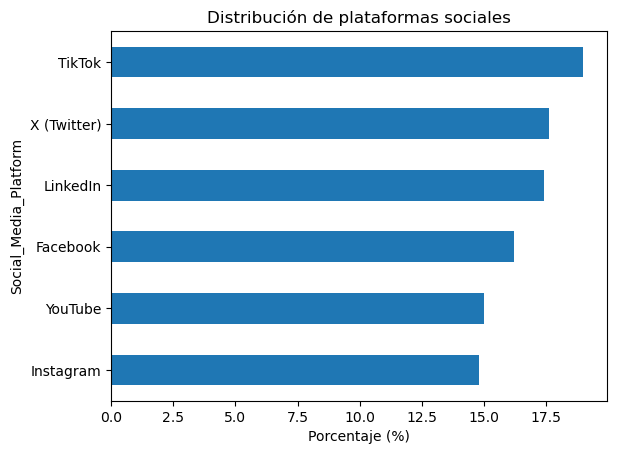

In [8]:
#Ver categorias reales y frecuencias de estas
counts = df["Social_Media_Platform"].value_counts(dropna=False)
pct = counts / counts.sum() * 100

pct.sort_values().plot(kind='barh', color='C0')
plt.xlabel('Porcentaje (%)')
plt.title('Distribución de plataformas sociales')
plt.show()

La distribución de los datos para las redes sociales estan relativamente bien balancedas (no hay una que destaque mucho por encima de otra), siendo la que más aparece TikTok con un 19%

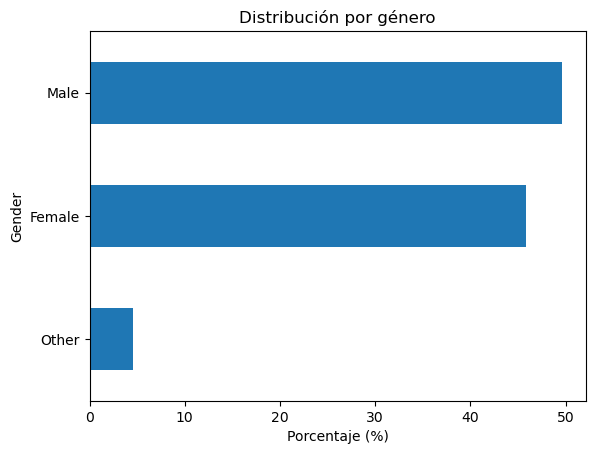

In [9]:
counts = df["Gender"].value_counts(dropna=False)
pct = counts / counts.sum() * 100

pct.sort_values().plot(kind='barh', color='C0')
plt.xlabel('Porcentaje (%)')
plt.title('Distribución por género')
plt.show()

Como se puede observar la distribución entre hombre y mujer esta bien balanceada pero la categoria de otros tiene muy pocos datos por lo que esto habria que tenerlo en cuenta cuando se realice el modelo.

Una vez comprobado el balance de los datos voy a ver mediante histogramas algo sobre la distribución, la tendencia y la propagación de cada atributo.

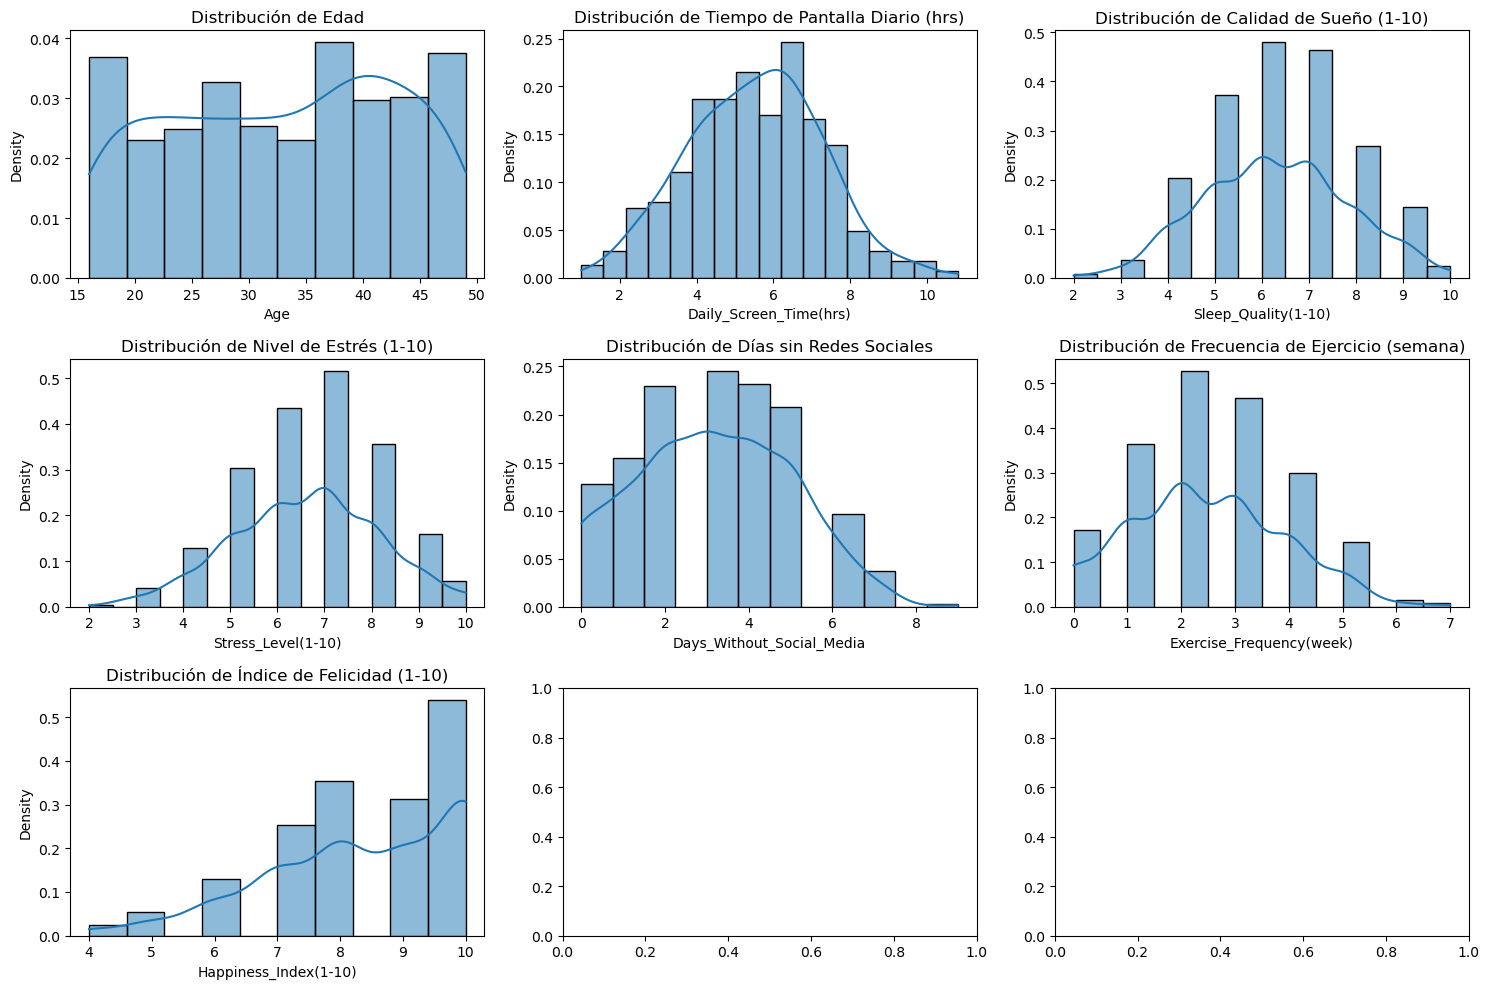

In [10]:
#Creación de los histogramas para ver la distribución de los datos
f, ax = plt.subplots(3, 3, figsize=(15,10))
sns.histplot(df_copy["Age"], kde=True, ax=ax[0,0], stat='density').set_title('Distribución de Edad')
sns.histplot(df_copy["Daily_Screen_Time(hrs)"], kde=True, ax=ax[0,1], stat='density').set_title('Distribución de Tiempo de Pantalla Diario (hrs)')
sns.histplot(df_copy["Sleep_Quality(1-10)"], kde=True, ax=ax[0,2], stat='density').set_title('Distribución de Calidad de Sueño (1-10)')
sns.histplot(df_copy["Stress_Level(1-10)"], kde=True, ax=ax[1,0], stat='density').set_title('Distribución de Nivel de Estrés (1-10)')
sns.histplot(df_copy["Days_Without_Social_Media"], kde=True, ax=ax[1,1], stat='density').set_title('Distribución de Días sin Redes Sociales')
sns.histplot(df_copy["Exercise_Frequency(week)"], kde=True, ax=ax[1,2], stat='density').set_title('Distribución de Frecuencia de Ejercicio (semana)')
sns.histplot(df_copy["Happiness_Index(1-10)"], kde=True, ax=ax[2,0], stat='density').set_title('Distribución de Índice de Felicidad (1-10)')
plt.tight_layout()
plt.show()

No ha presentado el hitograma de los datos categoricos como son el genero y las redes sociales puesto que pienso que no tiene sentido que esten representados.

En cuanto al resto de histogramas se puede decir: 
- La edad no presenta una distribución gaussiana sino más bien es relativamente heterogéneas.
- En cuanto a la distribución del tiempo en pantalla se puede asemejar a una distribución normal, aunque está es un poco asimétrica hacia la derecha.
- La distribución del sueño también está proxima a una normal, aunque presenta ligeras colas.
- En cuanto al nivel de estrés también se puede ver que tiene una semejanza a una distribución normal pero con ligera aismetría.
- En cuanto a los días en redes sociales no presenta una distribución normal, sino que se puede ver que hay muchos que pasan pocos días separados de las redes sociales y que puede haber outlayers en los valores altos.
- En cuanto al ejercicio tampoco presenta una distribución que se asemeje a una normal.
- Y para la distribución del indice de felicidad se puede ver que los datos estan concentrado en los valores altos.

De todas esta distribuciones la unica que en un pricipio se puede asumir como distribución normal es la correspodiente a las horas frente a la pantalla. Del resto que se pueden asemejar a una normal no podemos asumir esa normalidad.

<a id="section23"></a>
## <font color="white">Boxplots </font>

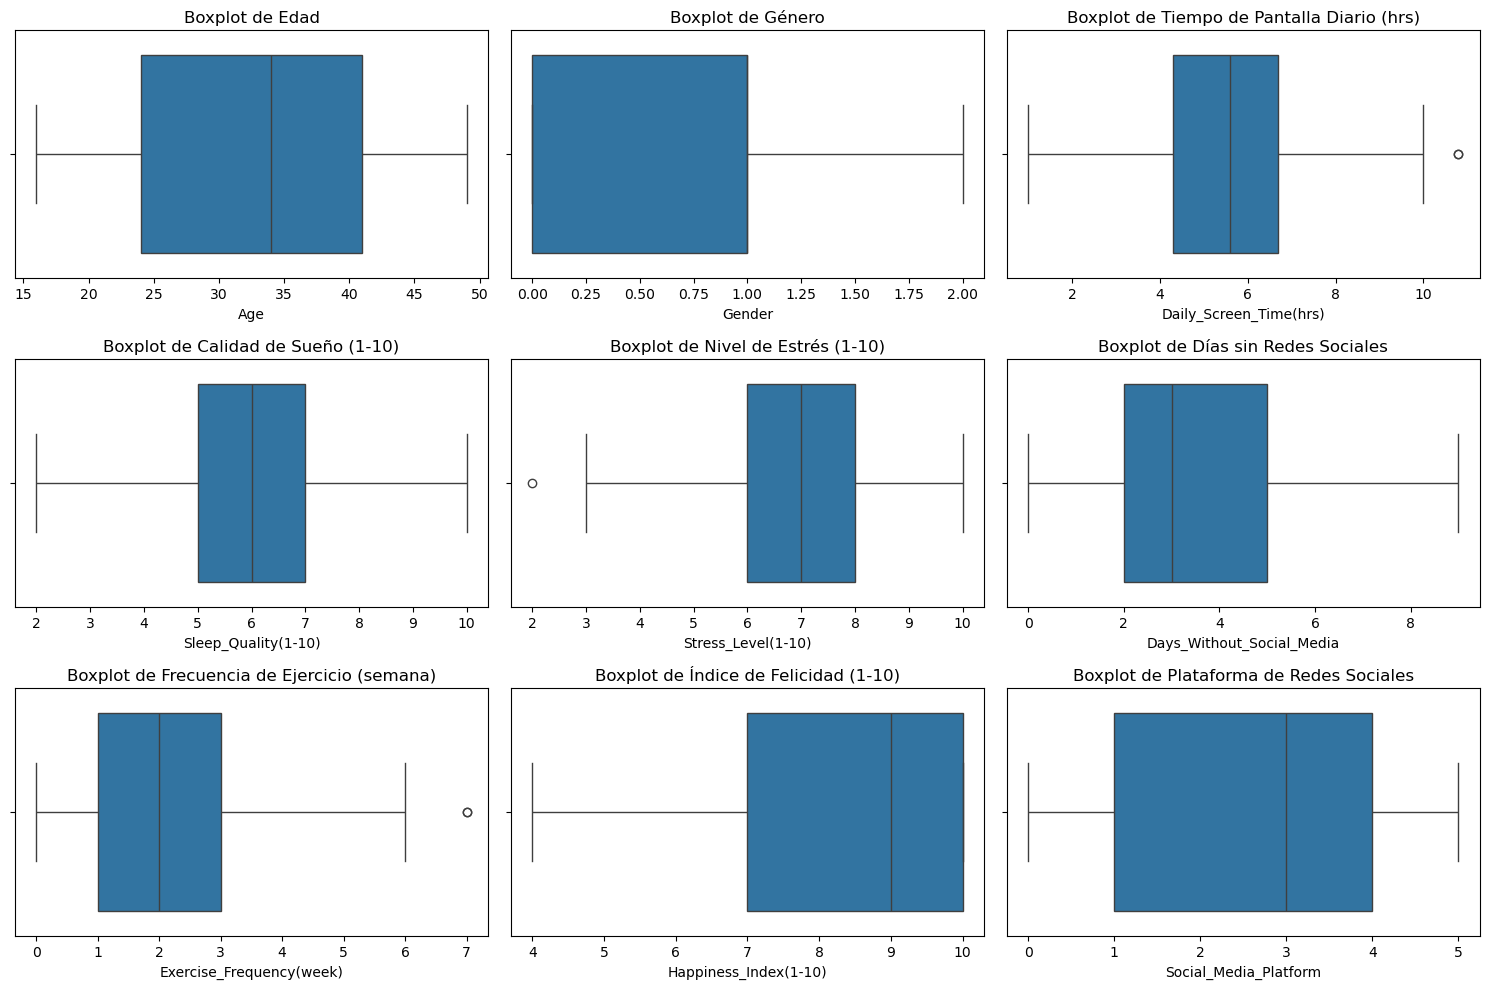

In [11]:
#Creación de los boxplots para ver la distribución de los datos y posibles outliers
f, ax = plt.subplots(3, 3, figsize=(15,10))
sns.boxplot(x=df_copy["Age"], ax=ax[0,0]).set_title('Boxplot de Edad')
sns.boxplot(x=df_copy["Gender"], ax=ax[0,1]).set_title('Boxplot de Género')
sns.boxplot(x=df_copy["Daily_Screen_Time(hrs)"], ax=ax[0,2]).set_title('Boxplot de Tiempo de Pantalla Diario (hrs)')
sns.boxplot(x=df_copy["Sleep_Quality(1-10)"], ax=ax[1,0]).set_title('Boxplot de Calidad de Sueño (1-10)')
sns.boxplot(x=df_copy["Stress_Level(1-10)"], ax=ax[1,1]).set_title('Boxplot de Nivel de Estrés (1-10)')
sns.boxplot(x=df_copy["Days_Without_Social_Media"], ax=ax[1,2]).set_title('Boxplot de Días sin Redes Sociales')
sns.boxplot(x=df_copy["Exercise_Frequency(week)"], ax=ax[2,0]).set_title('Boxplot de Frecuencia de Ejercicio (semana)')
sns.boxplot(x=df_copy["Happiness_Index(1-10)"], ax=ax[2,1]).set_title('Boxplot de Índice de Felicidad (1-10)')
sns.boxplot(x=df_copy["Social_Media_Platform"], ax=ax[2,2]).set_title('Boxplot de Plataforma de Redes Sociales')
plt.tight_layout()
plt.show()

De los boxplot creados se puede ver:
- La edad no presenta una distribución gaussiana sino más bien es relativamente heterogéneas.
- El genero no tiene sentido usar boxplot puesto que son valores categóricos codificados
- El tiempo frente a la pantalla tiene un ligera asimetría a la derecha y tiene algún valor extremo, pero si parece una distribución normal.
- La calidad del sueño tiene una caja relativamente simétrica, los valores están concentrados alrededor de 6, con una dispersión moderada.
- El nivel de estrés presenta una ligera asimétrica, con algún outlayer bajo, se puede decir que el nivel de estrés es moderado-alto.
- Los dias sin redes sociales, tiene una cola larga a la derecha, indicando que muchos pasan pocos dias sin usar redes sociales.
- La frecuencia con la que hacen ejercicio son datos discretos y aparece un outlier en 7, la mayoría hace poco ejercicio semanalmente.
- El nivel de felicidad es una caja desplazada hacia los valores altos, lo que muestra que las personas son generalmente felices.
- En cuanto a las plataforma de redes sociales usadas no tiene sentido hacer el boxplot.

Una vez comprobados los boxplot para ver la distribucio de los datos y posibles outliers, voy a ver las correlaciones.

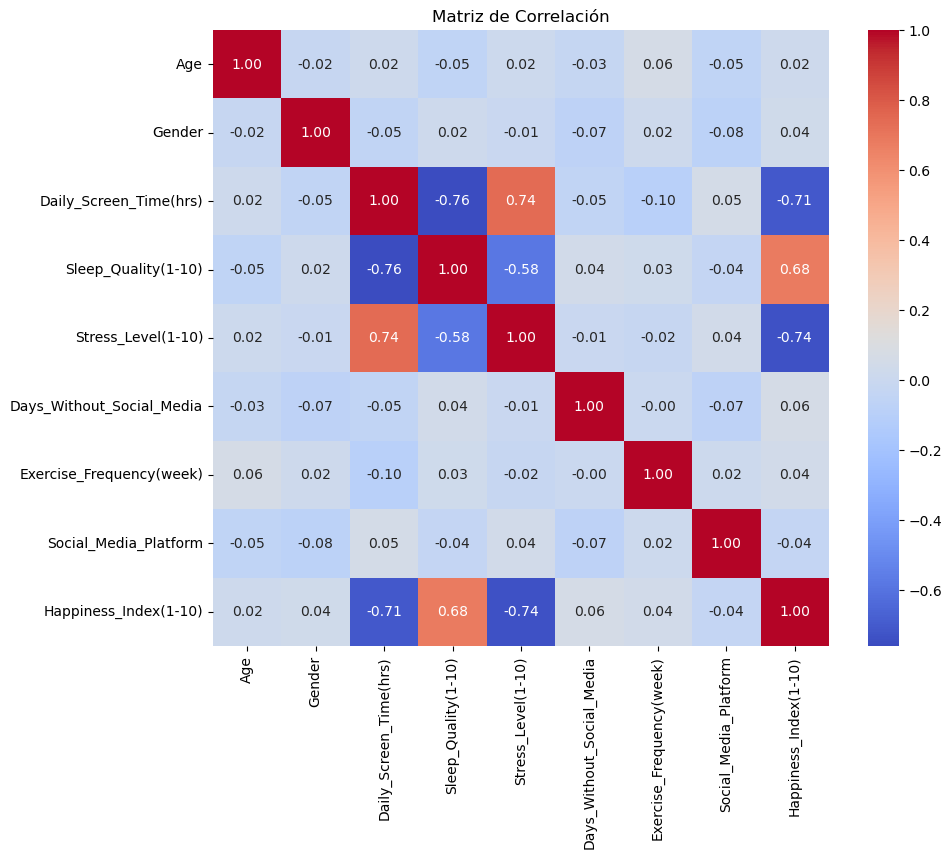

In [12]:
#Calcular las correlaciones entre las variables numéricas
correlation_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Relaciones fuertes observadas:

- Daily_Screen_Time vs Sleep_Quality: fuerte negativa (~-0.76).
- Daily_Screen_Time vs Stress_Level: fuerte positiva (~+0.74).
- Daily_Screen_Time vs Happiness_Index: fuerte negativa (~-0.71).
- Stress_Level vs Happiness_Index: fuerte negativa (~-0.74).
- Sleep_Quality vs Happiness_Index: positiva (~+0.68).

Esto implica que el tiempo de pantalla se asocia a peor sueño, más estrés y menor felicidad; estrés y sueño están fuertemente relacionados con felicidad.

Los atributos que pueden ser interesantes para predecir a partir de otros son: 

- Predecir Happiness_Index (regresión): Usar como predictores principales:

    - Stress_Level, Sleep_Quality, Daily_Screen_Time
    - Complementarios: Exercise_Frequency, Days_Without_Social_Media, Age
    - Evitar usar Social_Media_Platform o Gender como numéricos; si se usan, codificar one‑hot.
- Predecir Stress_Level: Predecir a partir de:

    - Daily_Screen_Time y Sleep_Quality son buenos predictores.
    - Añadir Exercise_Frequency / Days_Without_Social_Media si tiene sentido.
- Predecir Sleep_Quality: Usar como predictores:

    - Daily_Screen_Time, Stress_Level, Exercise_Frequency.

Una vez comprobadas las correlaciones entre las diferentes caracteríscas, por último voy a comprobar la matriz de dispersión para ver si mis deducciones anteriores son correctas.

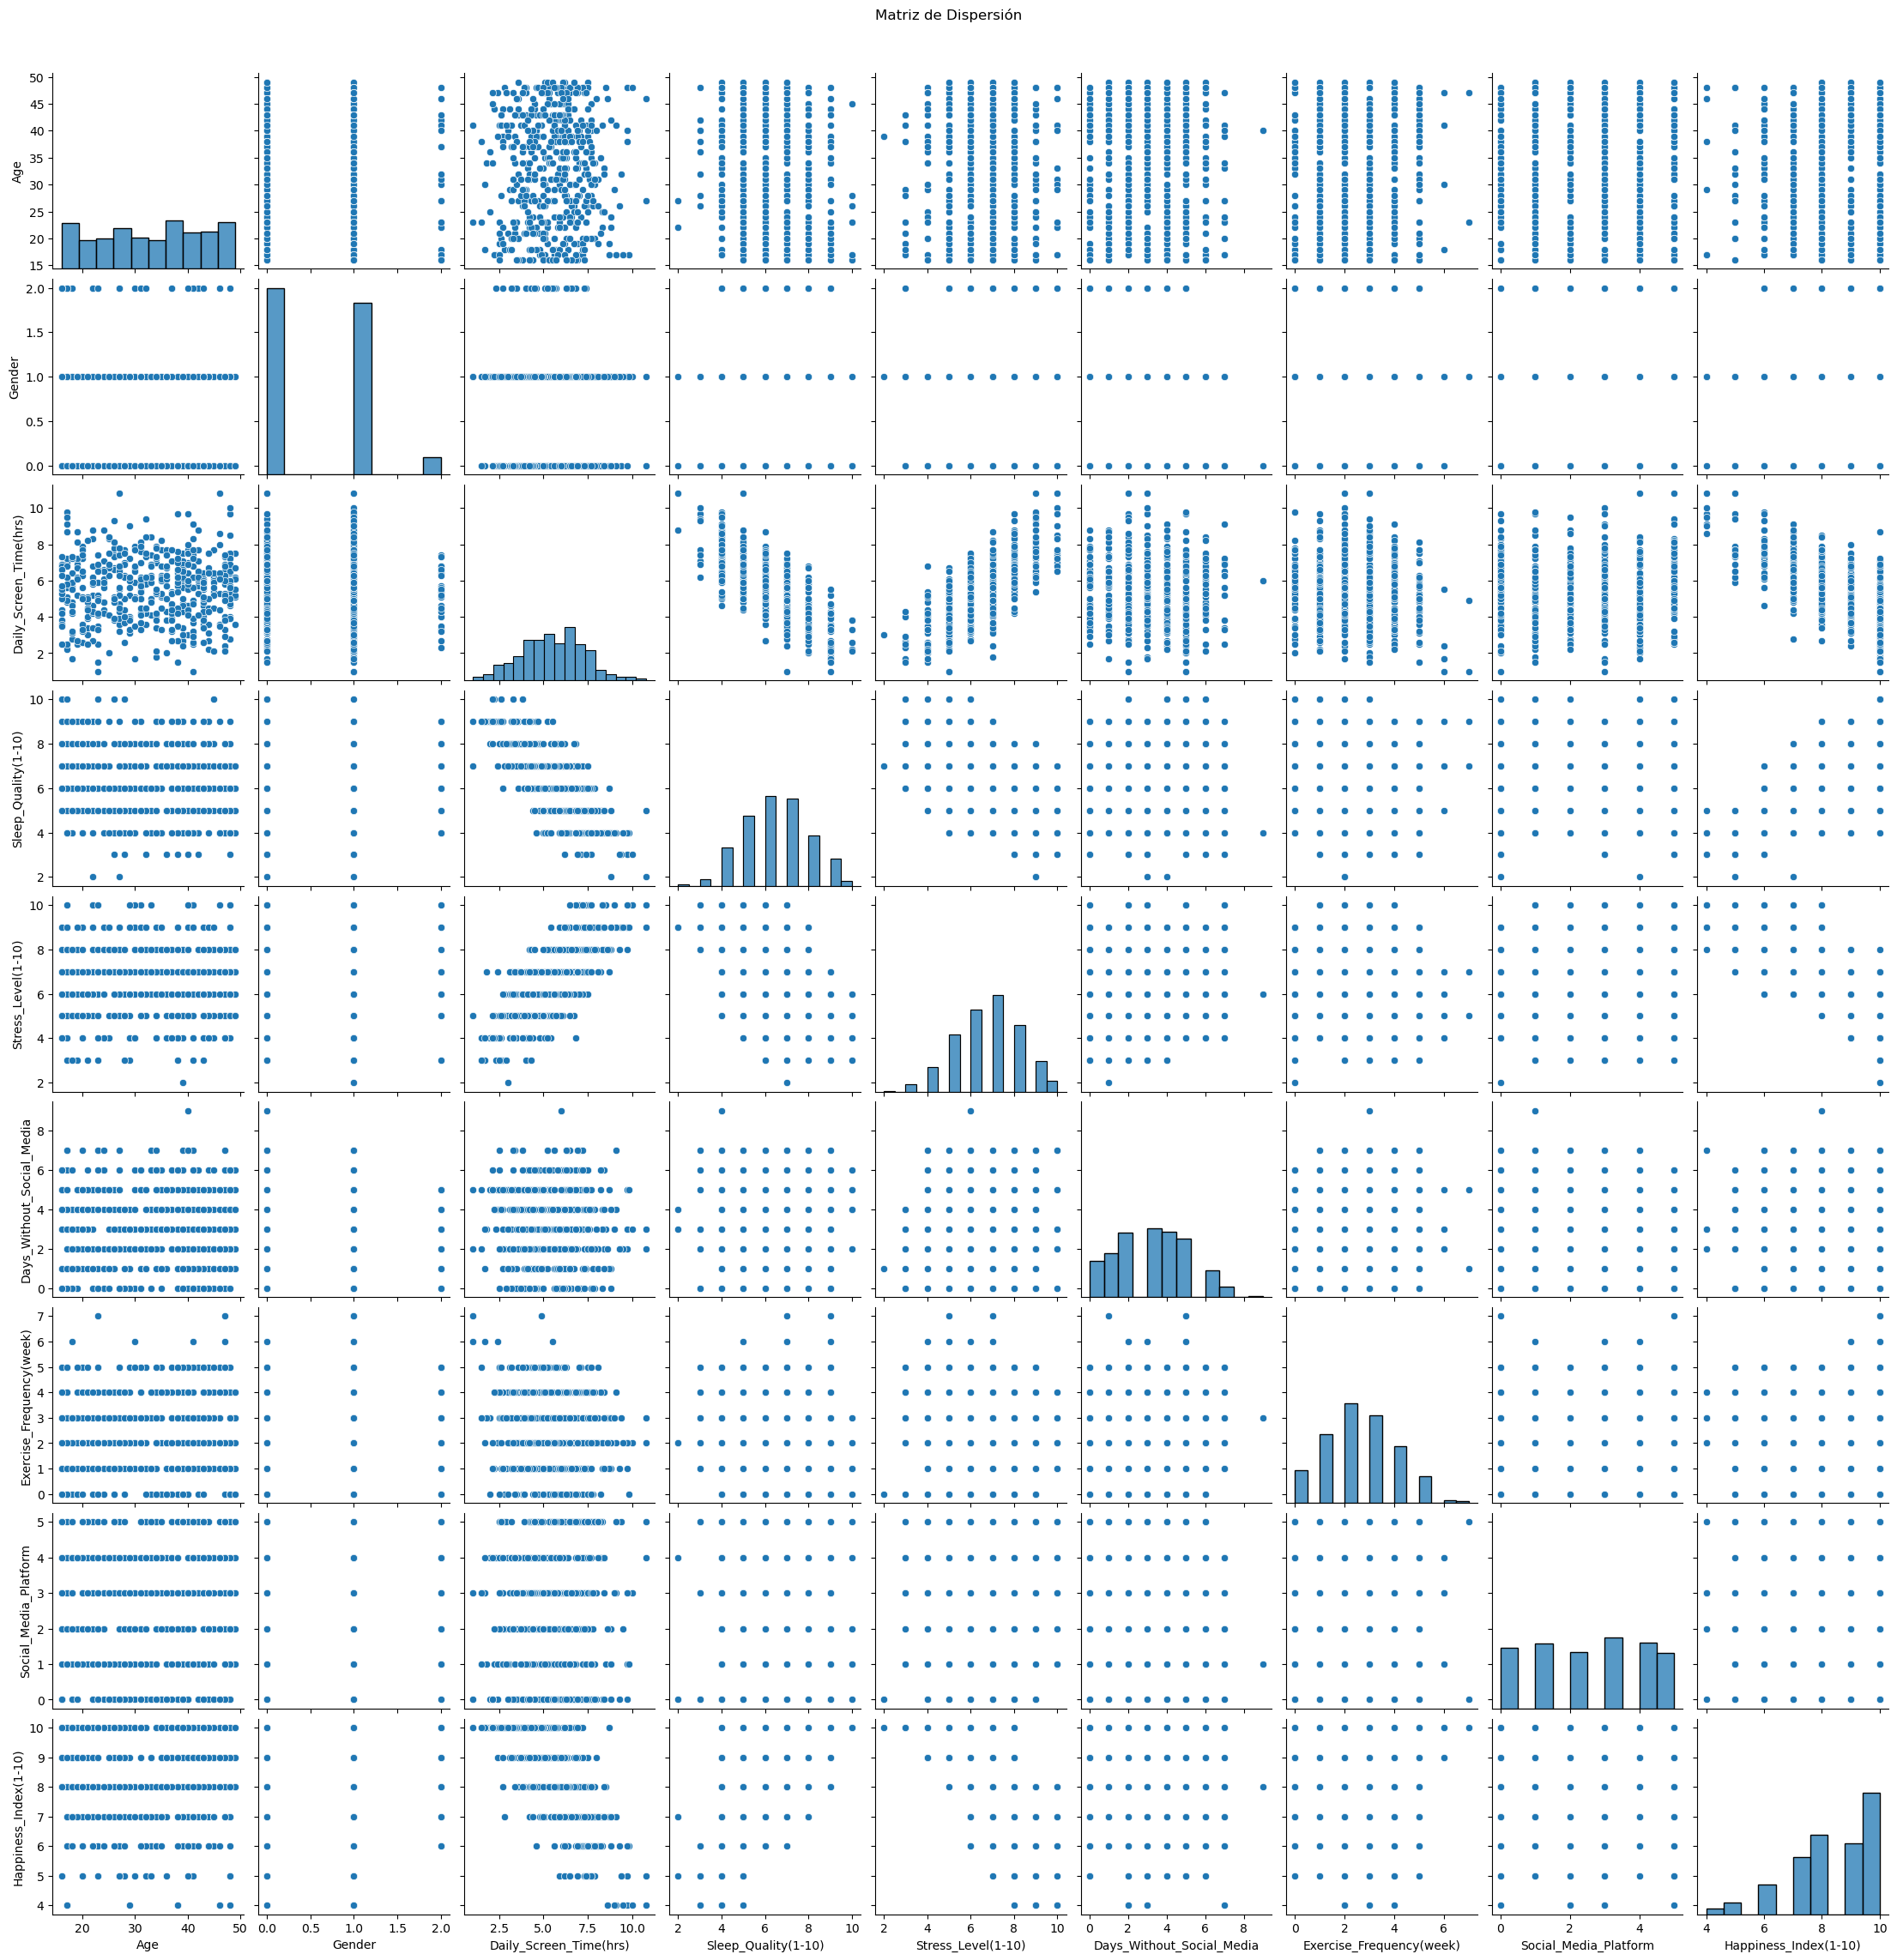

In [13]:
#Creación de las matrices de dispersión para ver las relaciones entre las variables
sns.pairplot(df_copy)
plt.suptitle('Matriz de Dispersión', y=1.02)
plt.show()

Relaciones con apariencia lineal fuerte:
- Daily_Screen_Time vs Sleep_Quality: relación negativa relativamente lineal.
- Daily_Screen_Time vs Stress_Level: relación positiva relativamente lineal.
- Daily_Screen_Time vs Happiness_Index: relación negativa.

Otras variables (Exercise_Frequency, Days_Without_Social_Media, Gender, Social_Media_Platform) son discretas/categóricas, muestran puntos en bandas verticales y no se ven tendencias lineales claras.

Para las parejas arriba listadas tiene sentido probar modelos de regresión lineal; para otras parejas puede ser mejor usar modelos que manejen variables categóricas/discretas o probar transformaciones/no lineales.